<a href="https://colab.research.google.com/github/Tanishka5502/Tani/blob/main/TANISHKA_NLP_PROJECT1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Spam/Ham Email Classification using Natural Language Processing**

TANISHKA 21CSU491

Spam/ham classification using natural language processing (NLP) involves leveraging computational algorithms to distinguish between spam (unsolicited or unwanted messages) and ham (legitimate messages) in text data. NLP techniques are utilized to extract features from text data, such as word frequencies, sentence structure, and semantic meaning, to build predictive models. These models can then classify incoming messages as either spam or ham based on learned patterns from training data. Common NLP approaches for spam/ham classification include bag-of-words, TF-IDF (Term Frequency-Inverse Document Frequency), and machine learning algorithms like Naive Bayes, Support Vector Machines, and deep learning models such as recurrent neural networks (RNNs) or transformers. Additionally, techniques like text preprocessing, feature engineering, and model evaluation are essential for improving classification accuracy and performance. By employing NLP in spam/ham classification, organizations can effectively filter out spam messages, enhance user experience, and mitigate security risks associated with unsolicited communication.









In [ ]:
!pip install NLTK
import nltk
import pandas as pd
import numpy as np
import re
from sklearn.feature_extraction.text import TfidfVectorizer
import string
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
dataset= pd.read_csv("SMSCollection.csv")
dataset.head()

,Class,sms
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
dataset['sms'][0]

'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [ ]:
dataset['sms'][1]

'Ok lar... Joking wif u oni...'

In [ ]:
print("Input data has {} rows and {} columns".format(len(dataset),len(dataset.columns)))

Input data has 5572 rows and 2 columns


In [ ]:
print("Out of {} rows, {} are spam. {} are ham".format(len(dataset),len(dataset[dataset['Class']=='spam']),len(dataset[dataset['Class']=='ham'])))

Out of 5572 rows, 747 are spam. 4825 are ham


In [ ]:
print("Number of null in class: {}".format(dataset['Class'].isnull().sum()))
print("Number of null in sms: {}".format(dataset['sms'].isnull().sum()))

Number of null in class: 0
Number of null in sms: 0


Preprocessing text data- Cleaning up the text data is necessary to highlight attributes that you are going to use in ML algorithms.

Cleaning or preprocessing the data consists of a number of steps

Remove Punctuation

Tokenization

Remove Stopwords

Lemmatize/Stemming

In [ ]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [ ]:
def remove_punct(text):
    text_nopunct="".join([char for char in text if char not in string.punctuation])
    return text_nopunct
dataset['sms_clean']=dataset['sms'].apply(lambda x:remove_punct(x))
dataset.head()

,Class,sms,sms_clean
0,ham,"Go until jurong point, crazy.. Available only ...",Go until jurong point crazy Available only in ...
1,ham,Ok lar... Joking wif u oni...,Ok lar Joking wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...,U dun say so early hor U c already then say
4,ham,"Nah I don't think he goes to usf, he lives aro...",Nah I dont think he goes to usf he lives aroun...


Tokenization- Tokenizing is splitting some string or sentence into a list of words

In [ ]:
import re
def tokenize(text):
    tokens=re.split('\W',text)
    return tokens
dataset['sms_tokenized']=dataset['sms_clean'].apply(lambda x:tokenize(x.lower()))
dataset.head()

,Class,sms,sms_clean,sms_tokenized
0,ham,"Go until jurong point, crazy.. Available only ...",Go until jurong point crazy Available only in ...,"[go, until, jurong, point, crazy, available, o..."
1,ham,Ok lar... Joking wif u oni...,Ok lar Joking wif u oni,"[ok, lar, joking, wif, u, oni]"
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,Free entry in 2 a wkly comp to win FA Cup fina...,"[free, entry, in, 2, a, wkly, comp, to, win, f..."
3,ham,U dun say so early hor... U c already then say...,U dun say so early hor U c already then say,"[u, dun, say, so, early, hor, u, c, already, t..."
4,ham,"Nah I don't think he goes to usf, he lives aro...",Nah I dont think he goes to usf he lives aroun...,"[nah, i, dont, think, he, goes, to, usf, he, l..."


Remove Stopwords- These are comonly used words like the, and, but, if that don't contribut much to the meaning of a sentence.

In [ ]:
stopwords= nltk.corpus.stopwords.words('english')
def remove_stopwords(tokenized_list):
    text=[word for word in tokenized_list if word not in stopwords]
    return text
dataset['sms_nostop']=dataset['sms_tokenized'].apply(lambda x:remove_stopwords(x))
dataset.head()

,Class,sms,sms_clean,sms_tokenized,sms_nostop
0,ham,"Go until jurong point, crazy.. Available only ...",Go until jurong point crazy Available only in ...,"[go, until, jurong, point, crazy, available, o...","[go, jurong, point, crazy, available, bugis, n..."
1,ham,Ok lar... Joking wif u oni...,Ok lar Joking wif u oni,"[ok, lar, joking, wif, u, oni]","[ok, lar, joking, wif, u, oni]"
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,Free entry in 2 a wkly comp to win FA Cup fina...,"[free, entry, in, 2, a, wkly, comp, to, win, f...","[free, entry, 2, wkly, comp, win, fa, cup, fin..."
3,ham,U dun say so early hor... U c already then say...,U dun say so early hor U c already then say,"[u, dun, say, so, early, hor, u, c, already, t...","[u, dun, say, early, hor, u, c, already, say]"
4,ham,"Nah I don't think he goes to usf, he lives aro...",Nah I dont think he goes to usf he lives aroun...,"[nah, i, dont, think, he, goes, to, usf, he, l...","[nah, dont, think, goes, usf, lives, around, t..."


Stemming- Stemming is the process of reducing inflected or derived words to their stem or root.

In [ ]:
ps=nltk.PorterStemmer()
def stemming(tokenized_text):
    text=[ps.stem(word) for word in tokenized_text]
    return text
dataset['sms_stemmed']=dataset['sms_nostop'].apply(lambda x:stemming(x))
dataset.head()

,Class,sms,sms_clean,sms_tokenized,sms_nostop,sms_stemmed
0,ham,"Go until jurong point, crazy.. Available only ...",Go until jurong point crazy Available only in ...,"[go, until, jurong, point, crazy, available, o...","[go, jurong, point, crazy, available, bugis, n...","[go, jurong, point, crazi, avail, bugi, n, gre..."
1,ham,Ok lar... Joking wif u oni...,Ok lar Joking wif u oni,"[ok, lar, joking, wif, u, oni]","[ok, lar, joking, wif, u, oni]","[ok, lar, joke, wif, u, oni]"
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,Free entry in 2 a wkly comp to win FA Cup fina...,"[free, entry, in, 2, a, wkly, comp, to, win, f...","[free, entry, 2, wkly, comp, win, fa, cup, fin...","[free, entri, 2, wkli, comp, win, fa, cup, fin..."
3,ham,U dun say so early hor... U c already then say...,U dun say so early hor U c already then say,"[u, dun, say, so, early, hor, u, c, already, t...","[u, dun, say, early, hor, u, c, already, say]","[u, dun, say, earli, hor, u, c, alreadi, say]"
4,ham,"Nah I don't think he goes to usf, he lives aro...",Nah I dont think he goes to usf he lives aroun...,"[nah, i, dont, think, he, goes, to, usf, he, l...","[nah, dont, think, goes, usf, lives, around, t...","[nah, dont, think, goe, usf, live, around, tho..."


Vectorization- This is defined as the process of encoding text as integers to create feature vectors. In out ontext we will be taking inividual text messages and converting it to a numeric vector that represents that text message.

Count Vectorization- This creates a document-term matrix where the entry of each cell will be a count of the number of times that word occured in that document.

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
def clean_text(text):
    text="".join([word.lower() for word in text if word not in string.punctuation])
    tokens=re.split('\W',text)
    text=[ps.stem(word) for word in tokens if word not in stopwords]
    return text
count_vect= CountVectorizer(analyzer=clean_text)
X_count=count_vect.fit_transform(dataset['sms'])
print(X_count.shape)

(5572, 8109)


In [ ]:
data_sample=dataset[0:20]
count_vect_sample= CountVectorizer(analyzer=clean_text)
X_count_sample= count_vect_sample.fit_transform(data_sample['sms'])
print(X_count_sample.shape)

(20, 222)


In [ ]:
X_count_sample

<20x222 sparse matrix of type '<class 'numpy.int64'>'
	with 252 stored elements in Compressed Sparse Row format>

In [ ]:
x_counts_df= pd.DataFrame(X_count_sample.toarray())
x_counts_df

,0,1,2,3,4,5,6,7,8,9,...,212,213,214,215,216,217,218,219,220,221
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,1,0,0,0,0,0,0,0,0,1,...,0,0,0,1,0,0,1,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,1,0,0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
9,0,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vect=TfidfVectorizer(analyzer=clean_text)
X_tfidf= tfidf_vect.fit_transform(dataset['sms'])
print(X_tfidf.shape)

(5572, 8109)


In [ ]:
data_sample=dataset[0:20]
tfidf_vect_sample=TfidfVectorizer(analyzer=clean_text)
X_tfidf_sample=tfidf_vect_sample.fit_transform(data_sample['sms'])
print(X_tfidf_sample.shape)

(20, 222)


# Feature Engineering: Feature Creation

In [ ]:
dataset['sms_len']=dataset["sms"].apply(lambda x:len(x)-x.count(" "))
dataset.head()

,Class,sms,sms_clean,sms_tokenized,sms_nostop,sms_stemmed,sms_len
0,ham,"Go until jurong point, crazy.. Available only ...",Go until jurong point crazy Available only in ...,"[go, until, jurong, point, crazy, available, o...","[go, jurong, point, crazy, available, bugis, n...","[go, jurong, point, crazi, avail, bugi, n, gre...",92
1,ham,Ok lar... Joking wif u oni...,Ok lar Joking wif u oni,"[ok, lar, joking, wif, u, oni]","[ok, lar, joking, wif, u, oni]","[ok, lar, joke, wif, u, oni]",24
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,Free entry in 2 a wkly comp to win FA Cup fina...,"[free, entry, in, 2, a, wkly, comp, to, win, f...","[free, entry, 2, wkly, comp, win, fa, cup, fin...","[free, entri, 2, wkli, comp, win, fa, cup, fin...",128
3,ham,U dun say so early hor... U c already then say...,U dun say so early hor U c already then say,"[u, dun, say, so, early, hor, u, c, already, t...","[u, dun, say, early, hor, u, c, already, say]","[u, dun, say, earli, hor, u, c, alreadi, say]",39
4,ham,"Nah I don't think he goes to usf, he lives aro...",Nah I dont think he goes to usf he lives aroun...,"[nah, i, dont, think, he, goes, to, usf, he, l...","[nah, dont, think, goes, usf, lives, around, t...","[nah, dont, think, goe, usf, live, around, tho...",49


In [ ]:
def count_punct(text):
    count=sum([1 for char in text if char in string.punctuation])
    return round(count/(len(text)-text.count(" ")),3)*100
dataset['punct%']=dataset["sms"].apply(lambda x:count_punct(x))
dataset.head()

,Class,sms,sms_clean,sms_tokenized,sms_nostop,sms_stemmed,sms_len,punct%
0,ham,"Go until jurong point, crazy.. Available only ...",Go until jurong point crazy Available only in ...,"[go, until, jurong, point, crazy, available, o...","[go, jurong, point, crazy, available, bugis, n...","[go, jurong, point, crazi, avail, bugi, n, gre...",92,9.8
1,ham,Ok lar... Joking wif u oni...,Ok lar Joking wif u oni,"[ok, lar, joking, wif, u, oni]","[ok, lar, joking, wif, u, oni]","[ok, lar, joke, wif, u, oni]",24,25.0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,Free entry in 2 a wkly comp to win FA Cup fina...,"[free, entry, in, 2, a, wkly, comp, to, win, f...","[free, entry, 2, wkly, comp, win, fa, cup, fin...","[free, entri, 2, wkli, comp, win, fa, cup, fin...",128,4.7
3,ham,U dun say so early hor... U c already then say...,U dun say so early hor U c already then say,"[u, dun, say, so, early, hor, u, c, already, t...","[u, dun, say, early, hor, u, c, already, say]","[u, dun, say, earli, hor, u, c, alreadi, say]",39,15.4
4,ham,"Nah I don't think he goes to usf, he lives aro...",Nah I dont think he goes to usf he lives aroun...,"[nah, i, dont, think, he, goes, to, usf, he, l...","[nah, dont, think, goes, usf, lives, around, t...","[nah, dont, think, goe, usf, live, around, tho...",49,4.1


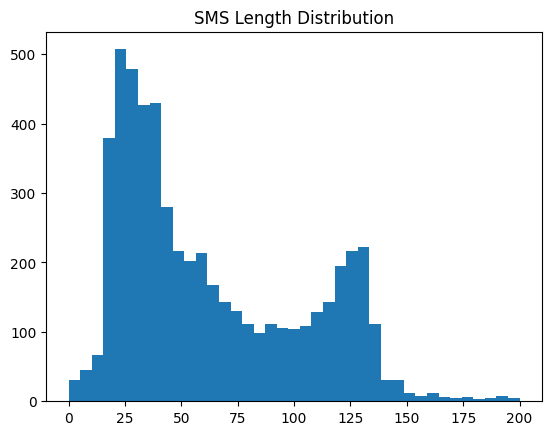

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
bins=np.linspace(0,200,40)
plt.hist(dataset['sms_len'],bins)
plt.title('SMS Length Distribution')
plt.show()

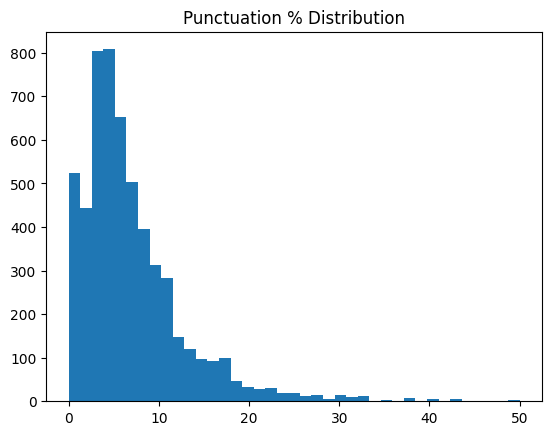

In [ ]:
bins=np.linspace(0,50,40)
plt.hist(dataset['punct%'],bins)
plt.title('Punctuation % Distribution')
plt.show()

In [ ]:
X_features=pd.concat([dataset['sms'],dataset['punct%'],pd.DataFrame(X_tfidf.toarray())],axis=1)
X_features.head()

,sms,punct%,0,1,2,3,4,5,6,7,...,8099,8100,8101,8102,8103,8104,8105,8106,8107,8108
0,"Go until jurong point, crazy.. Available only ...",9.8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Ok lar... Joking wif u oni...,25.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Free entry in 2 a wkly comp to win FA Cup fina...,4.7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,U dun say so early hor... U c already then say...,15.4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,"Nah I don't think he goes to usf, he lives aro...",4.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report
data = pd.read_csv('SMSCollection.csv')
X_train, X_test, y_train, y_test = train_test_split(data['sms'], data['Class'], test_size=0.2, random_state=42)
vectorizer = CountVectorizer()
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)
classifier = MultinomialNB()
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:")
print(classification_rep)

Accuracy: 0.99
Classification Report:
              precision    recall  f1-score   support

         ham       0.99      1.00      1.00       966
        spam       1.00      0.94      0.97       149

    accuracy                           0.99      1115
   macro avg       1.00      0.97      0.98      1115
weighted avg       0.99      0.99      0.99      1115



References: Internship at Acmegrade Pvt. Ltd.